In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/DrivenData')

In [112]:
import pandas as pd
import numpy as np

#**------------------Reading data------------------**

In [113]:
training_features = pd.read_csv('dataset/training_set_features.csv')
training_labels = pd.read_csv('dataset/training_set_labels.csv')

In [114]:
training_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [116]:
data_df = pd.merge(training_features, training_labels, on='respondent_id')

In [201]:
testing_features = pd.read_csv('dataset/test_set_features.csv')
testing_features.shape

(26708, 36)

#**------------------Handling missing data------------------**

In [117]:
data_df.isna()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
26703,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26704,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
26705,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [118]:
data_df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [119]:
data_df.mode().iloc[0]

respondent_id                                          0
h1n1_concern                                         2.0
h1n1_knowledge                                       1.0
behavioral_antiviral_meds                            0.0
behavioral_avoidance                                 1.0
behavioral_face_mask                                 0.0
behavioral_wash_hands                                1.0
behavioral_large_gatherings                          0.0
behavioral_outside_home                              0.0
behavioral_touch_face                                1.0
doctor_recc_h1n1                                     0.0
doctor_recc_seasonal                                 0.0
chronic_med_condition                                0.0
child_under_6_months                                 0.0
health_worker                                        0.0
health_insurance                                     1.0
opinion_h1n1_vacc_effective                          4.0
opinion_h1n1_risk              

In [120]:
# prompt: write code to remove columns

data_df = data_df.drop('health_insurance', axis=1)


In [121]:
data_df = data_df.drop('employment_industry', axis=1)

In [122]:
data_df = data_df.drop('employment_occupation', axis=1)

In [123]:
data_df = data_df.dropna()

In [124]:
data_df.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [125]:
len(data_df)
data_df.shape

(19642, 35)

<ipython-input-126-277f21cb80d3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr()


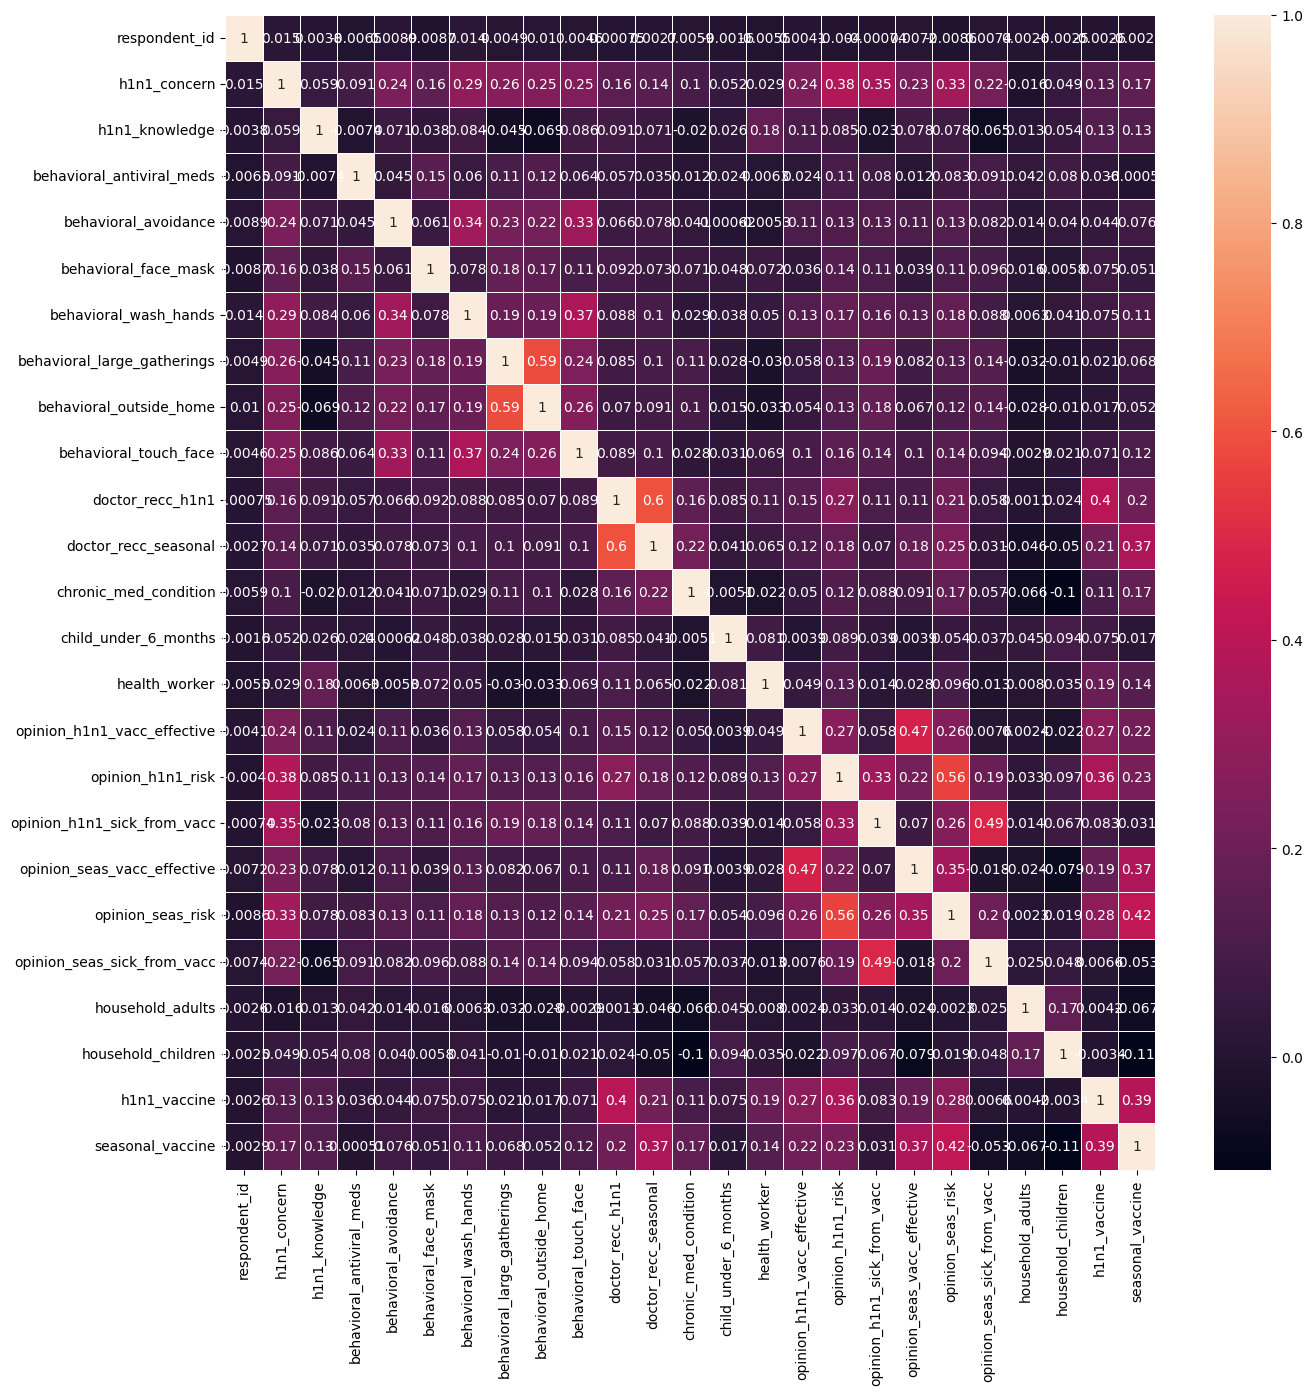

In [126]:
# prompt: correlation matrix, it should look clean and bigger

import matplotlib.pyplot as plt
import seaborn as sns

corr = data_df.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
plt.show()


#**------------------Training on these columns ------------------**
##**['doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk']**

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [129]:
columns_to_train = ['doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk']
X = data_df[columns_to_train]
y_h1n1 = data_df['h1n1_vaccine']
y_seasonal = data_df['seasonal_vaccine']

In [130]:
# Split the data into training and testing sets for h1n1 vaccine
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)

# Split the data into training and testing sets for seasonal vaccine
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

In [131]:
# Initialize models
models = {
    "Random Forest for H1N1": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting for H1N1": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine for H1N1": SVC(kernel='rbf', random_state=42),
    "Logistic Regression for H1N1": LogisticRegression(random_state=42),

    "Random Forest for Seasonal": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting for Seasonal": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine for Seasonal": SVC(kernel='rbf', random_state=42),
    "Logistic Regression for Seasonal": LogisticRegression(random_state=42)
}

In [132]:
# Train and evaluate models for h1n1 vaccine
for name, model in models.items():
    if "H1N1" in name:
        model.fit(X_train_h1n1, y_train_h1n1)
        y_pred = model.predict(X_test_h1n1)
        accuracy = accuracy_score(y_test_h1n1, y_pred)
        print(f"{name} Accuracy:", accuracy)

Random Forest for H1N1 Accuracy: 0.8060575209977093
Gradient Boosting for H1N1 Accuracy: 0.8070755917536269
Support Vector Machine for H1N1 Accuracy: 0.8106388393993382
Logistic Regression for H1N1 Accuracy: 0.8116569101552558


In [133]:
# Train and evaluate models for seasonal vaccine
for name, model in models.items():
    if "Seasonal" in name:
        model.fit(X_train_seasonal, y_train_seasonal)
        y_pred = model.predict(X_test_seasonal)
        accuracy = accuracy_score(y_test_seasonal, y_pred)
        print(f"{name} Accuracy:", accuracy)

Random Forest for Seasonal Accuracy: 0.754135912445915
Gradient Boosting for Seasonal Accuracy: 0.7551539832018326
Support Vector Machine for Seasonal Accuracy: 0.7459913463985747
Logistic Regression for Seasonal Accuracy: 0.7459913463985747


#**------------------Training on all columns ------------------**

In [149]:
data_df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                       object
race                            object
sex                             object
income_poverty           

In [186]:
data_df['employment_status'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed'], dtype=object)

In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_df["census_msa"] = le.fit_transform(data_df["census_msa"])

In [196]:
X = data_df
y_h1n1 = data_df['h1n1_vaccine']
y_seasonal = data_df['seasonal_vaccine']

In [197]:
# Split the data into training and testing sets for h1n1 vaccine
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)

# Split the data into training and testing sets for seasonal vaccine
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

In [198]:
# Initialize models
models = {
    "Random Forest for H1N1": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting for H1N1": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine for H1N1": SVC(kernel='rbf', random_state=42),
    "Logistic Regression for H1N1": LogisticRegression(random_state=42),

    "Random Forest for Seasonal": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting for Seasonal": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine for Seasonal": SVC(kernel='rbf', random_state=42),
    "Logistic Regression for Seasonal": LogisticRegression(random_state=42)
}

In [199]:
# Train and evaluate models for h1n1 vaccine
for name, model in models.items():
    if "H1N1" in name:
        model.fit(X_train_h1n1, y_train_h1n1)
        y_pred = model.predict(X_test_h1n1)
        accuracy = accuracy_score(y_test_h1n1, y_pred)
        print(f"{name} Accuracy:", accuracy)

Random Forest for H1N1 Accuracy: 1.0
Gradient Boosting for H1N1 Accuracy: 1.0
Support Vector Machine for H1N1 Accuracy: 0.7709340799185543
Logistic Regression for H1N1 Accuracy: 0.9259353525069992


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
# Train and evaluate models for seasonal vaccine
for name, model in models.items():
    if "Seasonal" in name:
        model.fit(X_train_seasonal, y_train_seasonal)
        y_pred = model.predict(X_test_seasonal)
        accuracy = accuracy_score(y_test_seasonal, y_pred)
        print(f"{name} Accuracy:", accuracy)

Random Forest for Seasonal Accuracy: 1.0
Gradient Boosting for Seasonal Accuracy: 1.0
Support Vector Machine for Seasonal Accuracy: 0.5176889793840672
Logistic Regression for Seasonal Accuracy: 0.9401883430898448


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## health_insurance missing values:

In [ ]:
data_df["health_insurance"].value_counts()[0]

In [ ]:
data_df["health_insurance"].value_counts()[1]

In [ ]:
data_df['health_insurance'].unique()

## employment_industry missing values

In [ ]:
data_df["employment_industry"].value_counts()['fcxhlnwr']

In [ ]:
data_df['employment_industry'].unique()

In [ ]:
data_df['employment_industry'].mode()[0]

## employment_occupation missing values

In [ ]:
data_df["employment_occupation"].value_counts()['xtkaffoo']

In [ ]:
data_df['employment_occupation'].unique()

In [ ]:
data_df['employment_occupation'].mode()[0]

In [ ]:
data_df['employment_occupation'].mode()[0]